In [3]:
import numpy as np
from qiskit import qpy, transpile, QuantumCircuit
from qiskit.circuit.library import QuantumVolume
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt

In [4]:
with open('AI_2qubits.qpy', 'rb') as fd:
    circ = qpy.load(fd)[0]

In [5]:
circ = QuantumVolume(2, 2, seed=42)
circ.measure_all()

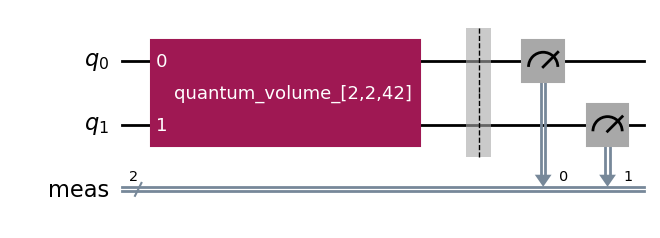

In [6]:
circ.draw('mpl')

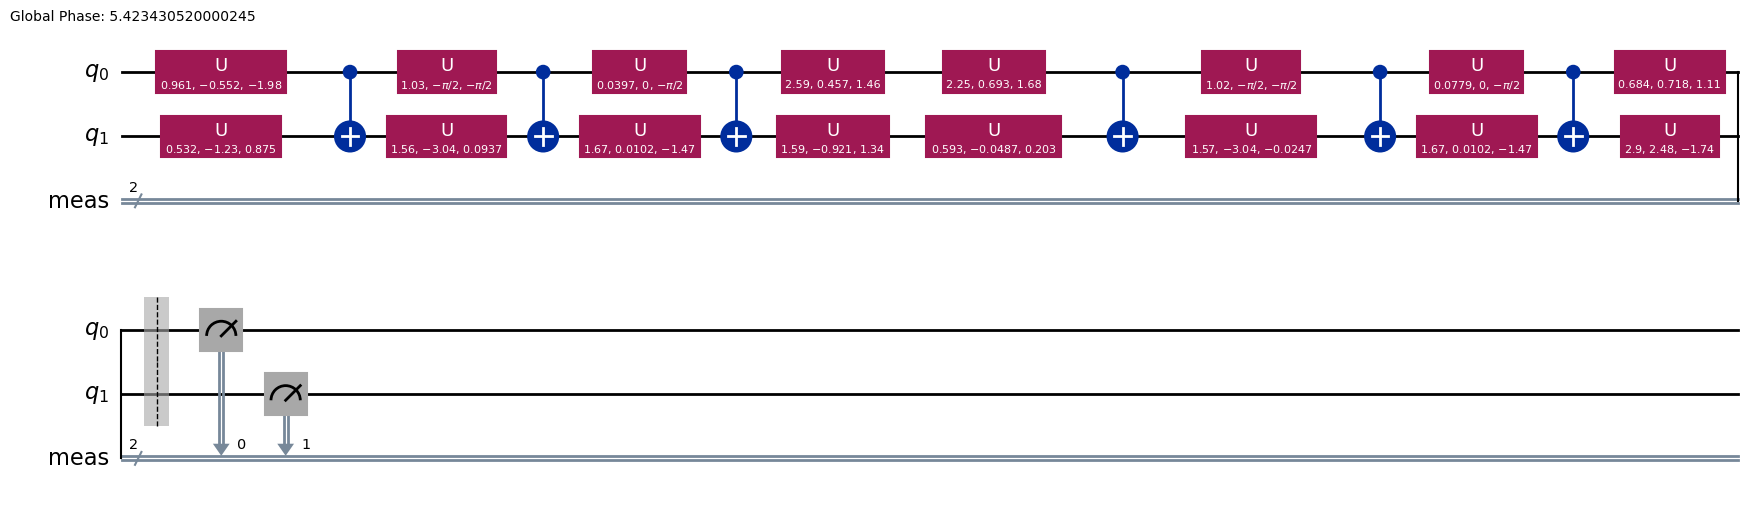

In [7]:
circ=circ.decompose(reps=2)
circ.draw('mpl')

In [8]:
with open('AI_2qubits.qpy', 'wb') as fd:
    qpy.dump(circ, fd)

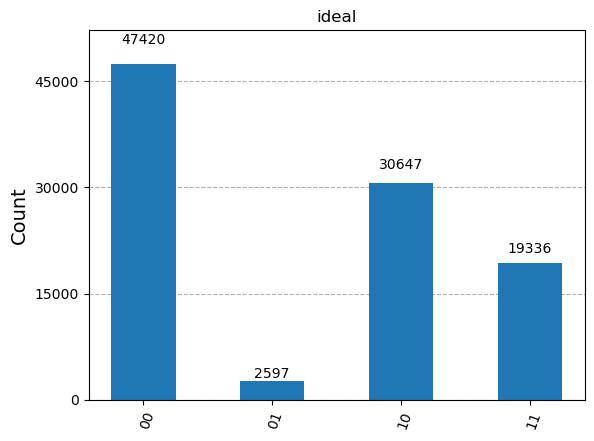

In [9]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
ideal_job = simulator.run(circ, shots=100000, memory = True)
result_ideal = ideal_job.result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal, title='ideal')

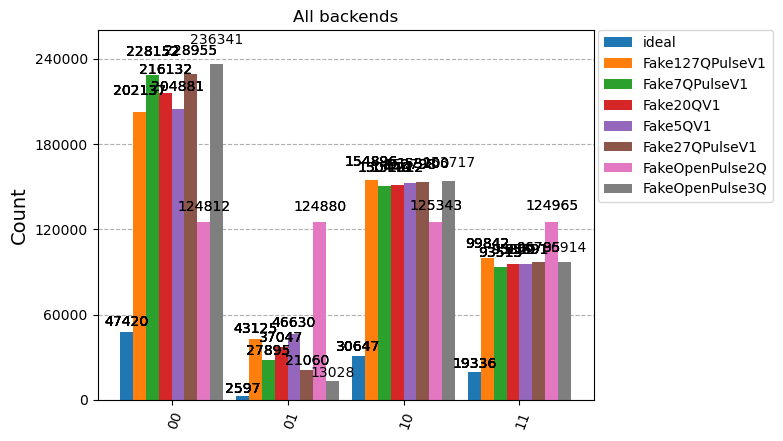

In [10]:
from qiskit.providers.fake_provider import Fake127QPulseV1, Fake7QPulseV1, Fake20QV1, Fake5QV1, Fake27QPulseV1, FakeOpenPulse2Q, FakeOpenPulse3Q, GenericBackendV2
Fake127QPulseV1 = Fake127QPulseV1()
Fake7Q = Fake7QPulseV1()
Fake20QV1 = Fake20QV1()
pulsv1job = Fake127QPulseV1.run(transpile(circ, Fake127QPulseV1), shots = 500000, memory = True)
pulsv1counts = pulsv1job.result().get_counts()

fake7qjob = Fake7Q.run(transpile(circ, Fake7Q), shots = 500000, memory = True)
fake7qcounts = fake7qjob.result().get_counts()

fake20qv1job = Fake20QV1.run(transpile(circ, Fake20QV1), shots = 500000, memory = True)
fake20qv1counts = fake20qv1job.result().get_counts()

fake5q = Fake5QV1()
fake5qjob = fake5q.run(transpile(circ, fake5q), shots = 500000, memory = True)
fake5qcounts = fake5qjob.result().get_counts()

fake27q = Fake27QPulseV1()
fake27qjob = fake27q.run(transpile(circ, fake27q), shots = 500000, memory = True)
fake27qcounts = fake27qjob.result().get_counts()

fakeopenpulse2q = FakeOpenPulse2Q()
fakeopenpulse2qjob = fakeopenpulse2q.run(transpile(circ, fakeopenpulse2q), shots = 500000, memory = True)
fakeopenpulse2qcounts = fakeopenpulse2qjob.result().get_counts()

fakeopenpulse3q = FakeOpenPulse3Q()
fakeopenpulse3qjob = fakeopenpulse3q.run(transpile(circ, fakeopenpulse3q), shots = 500000, memory = True)
fakeopenpulse3qcounts = fakeopenpulse3qjob.result().get_counts()




plot_histogram([counts_ideal, pulsv1counts, fake7qcounts, fake20qv1counts, fake5qcounts, fake27qcounts, fakeopenpulse2qcounts, fakeopenpulse3qcounts], title='All backends', legend=['ideal', 'Fake127QPulseV1', 'Fake7QPulseV1', 'Fake20QV1', 'Fake5QV1', 'Fake27QPulseV1', 'FakeOpenPulse2Q', 'FakeOpenPulse3Q'])

In [11]:


Fake20QV1raw = fake20qv1job.result().get_memory()
Fake20QV1final = [''.join(Fake20QV1raw[i:i+100]) for i in np.arange(0, len(Fake20QV1raw), 100)]

Fake7Qraw = fake7qjob.result().get_memory()
Fake7Qfinal = [''.join(Fake7Qraw[i:i+100]) for i in np.arange(0, len(Fake7Qraw), 100)]

Fake127QPulseV1raw = pulsv1job.result().get_memory()
Fake127QPulseV1final = [''.join(Fake127QPulseV1raw[i:i+100]) for i in np.arange(0, len(Fake127QPulseV1raw), 100)]

Fake5QV1raw = fake5qjob.result().get_memory()
Fake5QV1final = [''.join(Fake5QV1raw[i:i+100]) for i in np.arange(0, len(Fake5QV1raw), 100)]

Fake27QPulseV1raw = fake27qjob.result().get_memory()
Fake27QPulseV1final = [''.join(Fake27QPulseV1raw[i:i+100]) for i in np.arange(0, len(Fake27QPulseV1raw), 100)]

FakeOpenPulse2Qraw = fakeopenpulse2qjob.result().get_memory()
FakeOpenPulse2Qfinal = [''.join(FakeOpenPulse2Qraw[i:i+100]) for i in np.arange(0, len(FakeOpenPulse2Qraw), 100)]

FakeOpenPulse3Qraw = fakeopenpulse3qjob.result().get_memory()
FakeOpenPulse3Qfinal = [''.join(FakeOpenPulse3Qraw[i:i+100]) for i in np.arange(0, len(FakeOpenPulse3Qraw), 100)]






In [12]:
with open('fakeibmfinal.txt', 'w') as file:
    [file.write(i+' '+'1\n') for i in Fake127QPulseV1final]
    [file.write(i+' '+'1\n') for i in Fake20QV1final]
    [file.write(i+' '+'1\n') for i in Fake7Qfinal]
    [file.write(i+' '+'1\n') for i in Fake5QV1final]
    [file.write(i+' '+'1\n') for i in Fake27QPulseV1final]
    [file.write(i+' '+'1\n') for i in FakeOpenPulse2Qfinal]
    [file.write(i+' '+'1\n') for i in FakeOpenPulse3Qfinal]
file.close()

In [24]:
'1'+'2'

'12'